<a href="https://colab.research.google.com/github/dutrajunior/python_estudos/blob/main/aula_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas Básicas e os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dados = pd.read_csv('https://raw.githubusercontent.com/dutrajunior/python_estudos/main/Social_Network_Ads.csv')
dados

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Aplicando o Label Encoder na coluna Gender

Para quem tiver dificuldade de ler o código abaixo, olhar a Aula 1 - SVM onde é explicado todo o processo de transformar colunas categóricas em numéricas de forma automática (sem passar pela transformação 1 coluna de cada vez)

In [24]:
colunas = dados.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

# Fazendo o Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categ_cols:
    le.fit(dados[i])
    dados[str(i) + '_encoded'] = le.transform(dados[i])

In [25]:
dados

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [26]:
dados = dados.drop('Gender', axis = 1)

# Quebrando a base em Treino e Teste

In [27]:
x = dados.drop('Purchased', axis = 1)
y = dados['Purchased']

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size= 0.3, random_state=42)

# Carregando o Modelo

Na nossa base temos dados de clientes + a informação se ele comprou um anúncio oferecido em rede social ou não. Usaremos o Naive Bayes para fazer essa previsão

## Treinando o modelo

In [29]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

modelo.fit(x_train,y_train)


GaussianNB()

## Fazendo a Previsão

In [30]:
y_pred = modelo.predict(x_test)

In [31]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

# Avaliando o Resultado

In [33]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8833333333333333


# Conclusão

Nosso modelo teve uma performance de 88% na acurácia

Isso quer dizer que a taxa de acerto foi muito alta, para uma avaliação adicional, vamos fazer uma matriz de confusão para entender onde estão estes acertos e erros

## Matriz de Confusão

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[73,  0],
       [14, 33]])

Text(50.722222222222214, 0.5, 'y_pred')

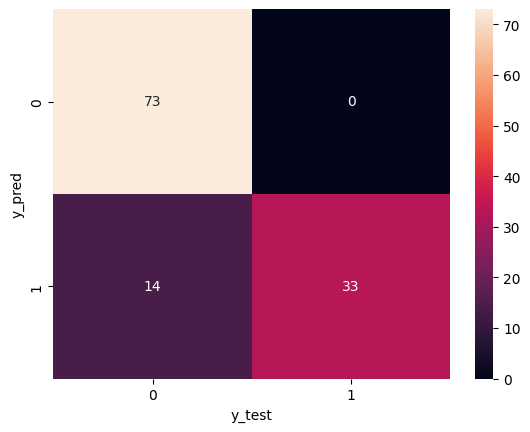

In [35]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred), annot= True)

plt.xlabel('y_test')
plt.ylabel('y_pred')

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))


1.0
0.7021276595744681
0.825
